In [1]:
# Install specific versions to avoid compatibility issues
%pip install mediapipe==0.10.9 numpy==1.24.3 protobuf==3.20.3 --quiet

# Force runtime restart after installing
# import os
# os.kill(os.getpid(), 9)

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mediapipe==0.10.9 (from versions: 0.10.13, 0.10.14, 0.10.18, 0.10.20, 0.10.21)
ERROR: No matching distribution found for mediapipe==0.10.9


In [1]:
import urllib.request

IMAGE_FILENAMES = ['burger.jpg', 'burger_crop.jpg']
for name in IMAGE_FILENAMES:
    url = f'https://storage.googleapis.com/mediapipe-assets/{name}'
    urllib.request.urlretrieve(url, name)

In [4]:
%pip install opencv-python-headless


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import math
from IPython.display import Image, display
import matplotlib.pyplot as plt

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

def resize_and_show(image):
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h / (w / DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w / (h / DESIRED_HEIGHT)), DESIRED_HEIGHT))
    # Convert BGR to RGB for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()


burger.jpg


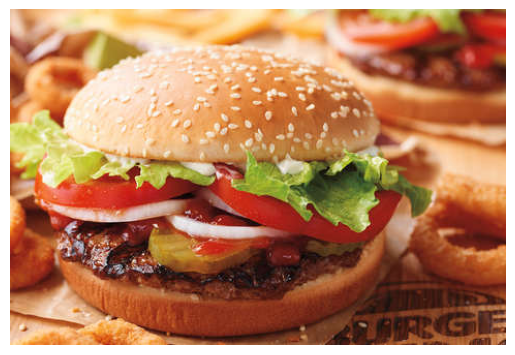

burger_crop.jpg


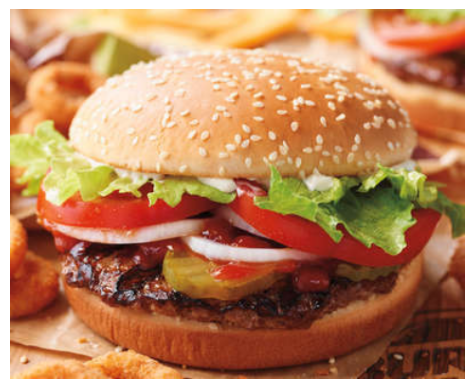

In [3]:
images = {name: cv2.imread(name) for name in IMAGE_FILENAMES}
for name, image in images.items():
    print(name)
    resize_and_show(image)


In [ ]:
# %pip uninstall opencv-python opencv-contrib-python -y


Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install mediapipe --force-reinstall


In [8]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import urllib.request

# Load model
model_path = 'https://storage.googleapis.com/mediapipe-models/image_embedder/mobilenet_v3_large/float32/latest/mobilenet_v3_large.tflite'
urllib.request.urlretrieve(model_path, 'mobilenet_v3_large.tflite')

# Embedder config
base_options = python.BaseOptions(model_asset_path='F:\Downloads\mobilenet_v3_large.tflite')
options = vision.ImageEmbedderOptions(
    base_options=base_options, l2_normalize=True, quantize=True
)

# Compute similarity
with vision.ImageEmbedder.create_from_options(options) as embedder:
    first_image = mp.Image.create_from_file(IMAGE_FILENAMES[0])
    second_image = mp.Image.create_from_file(IMAGE_FILENAMES[1])
    first_embedding = embedder.embed(first_image)
    second_embedding = embedder.embed(second_image)

    similarity = vision.ImageEmbedder.cosine_similarity(
        first_embedding.embeddings[0], second_embedding.embeddings[0]
    )
    print(f"Cosine Similarity: {similarity}")

<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
C:\Users\DELL\AppData\Local\Temp\ipykernel_5780\2616920489.py:11: SyntaxWarning: invalid escape sequence '\D'
  base_options = python.BaseOptions(model_asset_path='F:\Downloads\mobilenet_v3_large.tflite')


Cosine Similarity: 0.9652888402248914
